In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, floor, ceil
import math
from __future__ import print_function
from __future__ import division
#import argparse
%matplotlib inline
from IPython.display import display, Math, Latex

In [2]:
src = cv.imread("JurP.jpg")
   
bgr_planes = cv.split(src)
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive

accumulate = False

b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

hist_w = 512
hist_h = 400

bin_w = int(round( hist_w/histSize ))

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)
    
cv.imshow('Source image', src)
cv.imshow('calcHist Demo', histImage)
k= cv.waitKey()

In [4]:
src = cv.imread("bird.jpg")
   
bgr_planes = cv.split(src)
histSize = 256
histRange = (0, 256) # the upper boundary is exclusive

accumulate = False

b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

hist_w = 512
hist_h = 400

bin_w = int(round( hist_w/histSize ))

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)
    
cv.imshow('Source image', src)
cv.imshow('calcHist Demo', histImage)
k= cv.waitKey()

# fig.add_subplot(1,2,1)
# plt.imshow(src, cmap='gray')

# # display the new image
# fig.add_subplot(1,2,2)
# plt.imshow(histImage, cmap='gray')

# plt.show()

# Histogram Equalization

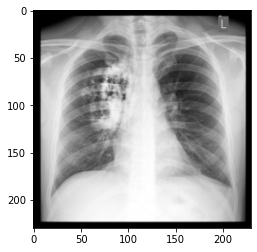

In [13]:

#import numpy as np
#import matplotlib.pyplot as plt
#from PIL import Image

img = cv.imread('lung.jpg')

# display the image
plt.imshow(img, cmap='gray')


(array([16683.,   486.,   186.,   201.,   246.,   216.,   324.,   468.,
          519.,   687.,   912.,   888.,  1104.,  1233.,  1407.,  1668.,
         1959.,  2292.,  2700.,  2856.,  4332.,  3384.,  3192.,  3126.,
         2742.,  2601.,  2421.,  2673.,  2598.,  2694.,  3612.,  2868.,
         3174.,  3345.,  3663.,  3894.,  4218.,  3993.,  4119.,  4770.,
         6363.,  5652.,  6003.,  5580.,  5247.,  4782.,  4269.,  4344.,
         5535.,  6471.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

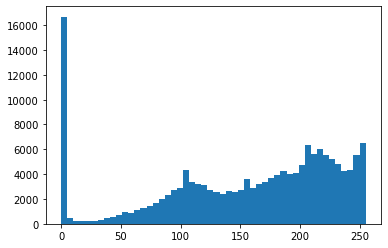

In [14]:
# convert our image into a numpy array
img1 = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img1.flatten()

# show the histogram
plt.hist(flat, bins=50)


# Formula

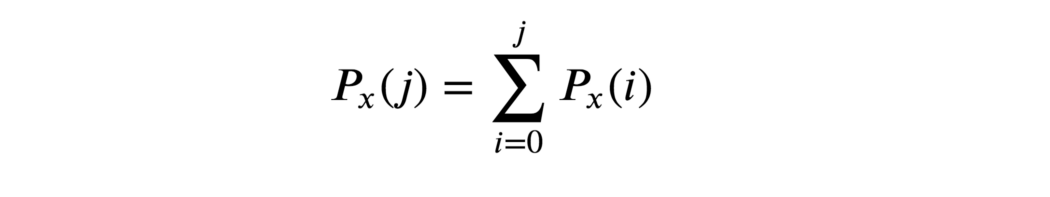

In [15]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

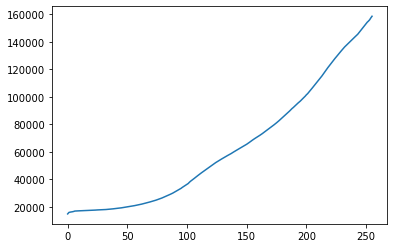

In [16]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)


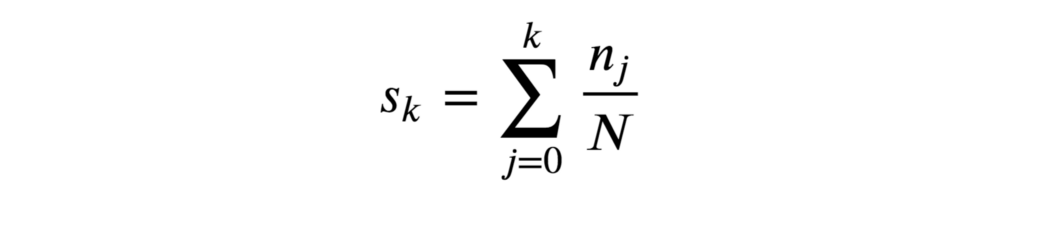

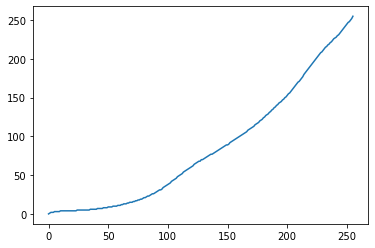

In [17]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

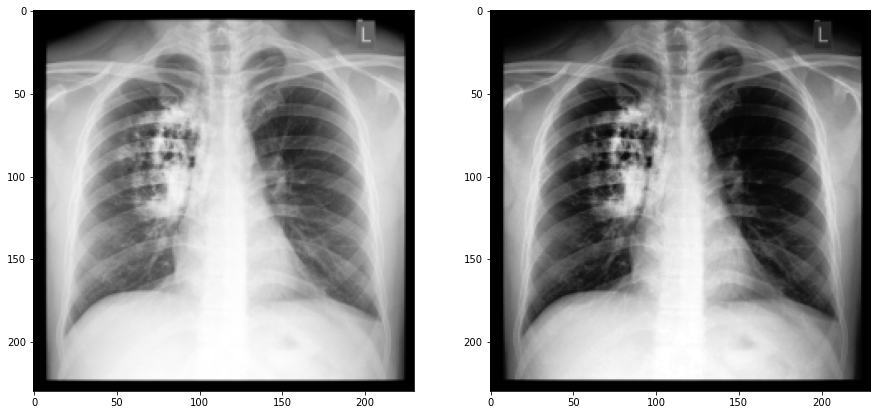

In [18]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)

# Histogram Equalization using Opencv

In [19]:
# read Image
src = cv.imread('lung.jpg')

# convert to grayscale
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# perform histogram equalization
dst = cv.equalizeHist(src)

#display
cv.imshow('Source image', src)
cv.imshow('Equalized Image', dst)
cv.waitKey()
k = cv.waitKey(0)

# Practice

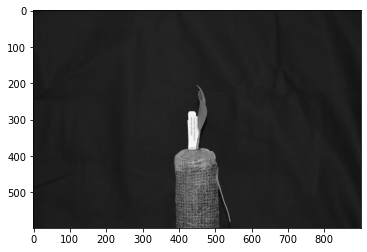

In [14]:
image=cv.imread("plant-seedling.jpg",0)
cv.imshow("Original Image",image)
k=cv.waitKey(0)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

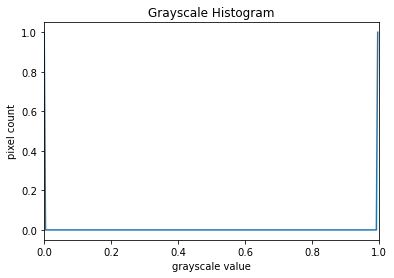

In [16]:
# create the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here

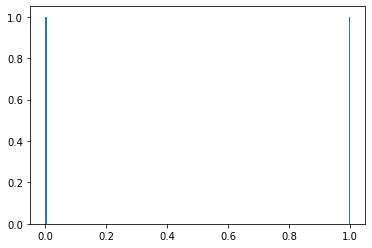

In [18]:
plt.hist(image.flatten(), bins= 256, range=(0,1)) # instead of histogram, plt.plot
plt.show()

In [14]:
img = cv.imread('bird.jpg',0)
hist = cv.calcHist([img],[0],None,[256],[0,256])
print(hist.shape)
# cv.imshow("Histogram Image", hist)
# k=cv.waitKey(0)

(256, 1)


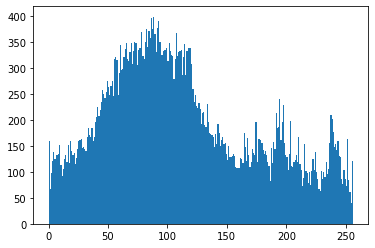

In [15]:
# using numpy matplot lib function
# no need to use calcHist or np.histogram function 

img = cv.imread('bird.jpg',0) # black image histogram
plt.hist(img.ravel(),256,[0,256])
plt.show()


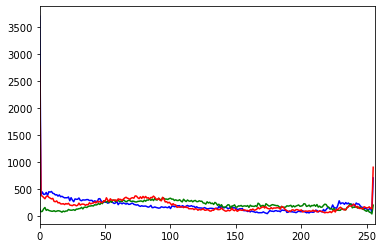

In [16]:
# or use normal plot using matplotlib , good for BGR plot

img = cv.imread('bird.jpg')
color = ('b','g','r')
for i,col in enumerate(color):               # coloured image histogram
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Use of Mask in histogram to find particular area in the image

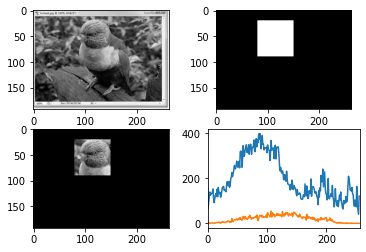

In [26]:
img = cv.imread('bird.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[20:90, 80:150] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

# Visualize
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()